In [45]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Literal

In [46]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriaminant: str
    result: str

In [47]:
def show_equation(state: QuadState) -> QuadState:
    equation = f"{state['a']}*2{state['b']}*{state['c']}"
    return {'equation': equation}

In [48]:

def calclulate_discriminant(state: QuadState):
    calclulate_discriminant = state['b']**2 - (4*state['a']*state['c'])

    return{'discriaminant': calclulate_discriminant}

In [49]:

def real_loops(state: QuadState):
    root1 = (-state["b"] + state["discriaminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriaminant"]**0.5)/(2*state["a"])
    result = f'The root are {root1} and {root2}'

    return {'result': result}

def repeated_loops(state: QuadState):
    root = (-state["b"])/(2*state["a"])
    result = f'only repeating root is  {root}'

    return {'result': result}

def no_real_loops(state: QuadState):
    result = f'no real roots'
    return {'result': result}


def check_condation(state: QuadState) -> Literal["real_loops","repeated_loops","no_real_loops"]:
    if state['discriaminant'] > 0:
        return "real_loops"
    elif state['discriaminant'] == 0:
        return "repeated_loops"
    else:
        return "no_real_loops"

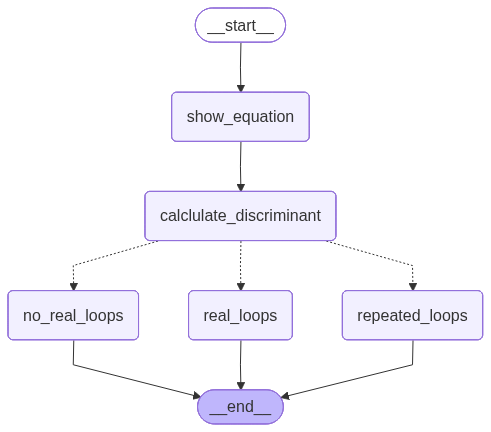

In [50]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calclulate_discriminant', calclulate_discriminant)
graph.add_node('real_loops', real_loops)
graph.add_node('repeated_loops', repeated_loops)
graph.add_node('no_real_loops', no_real_loops)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calclulate_discriminant')
graph.add_conditional_edges('calclulate_discriminant', check_condation)
graph.add_edge('real_loops', END)
graph.add_edge('repeated_loops', END)
graph.add_edge('no_real_loops', END)

workflow = graph.compile()
workflow

In [51]:
initial_state = {
    'a': 4,
    'b': -5,
    'c': -4
}
workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4*2-5*-4',
 'discriaminant': 89,
 'result': 'The root are 1.8042476415070754 and -0.5542476415070754'}